<a href="https://colab.research.google.com/github/Basith-Ahmed/ML-Trading-Bot/blob/main/Butcher_Prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

ticker_symbol = 'BTC-USD'

bitcoin_data = yf.download(ticker_symbol, start="2021-01-01", end="2024-01-01")

bitcoin_data = bitcoin_data

bitcoin_data.head()

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782


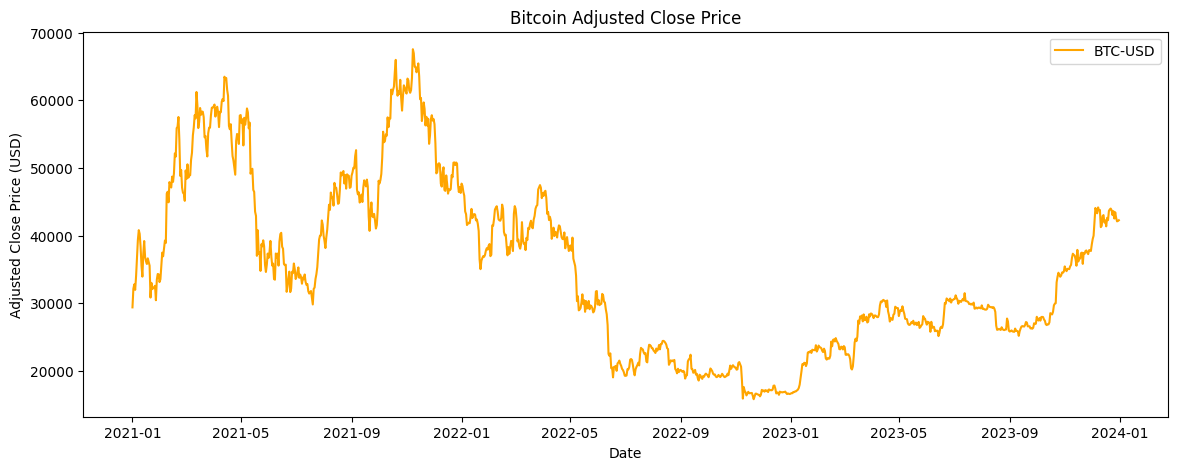

In [ ]:
import matplotlib.pyplot as plt

# Plot the Adjusted Close price
plt.figure(figsize=(14, 5))
plt.plot(bitcoin_data.index, bitcoin_data['Adj Close'], label='BTC-USD', color='orange')

plt.title('Bitcoin Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Calculate Exponential Moving Averages (EMAs)
ema_periods = [5, 25, 50, 99, 200]

for period in ema_periods:
    column_name = f'EMA_{period}'
    bitcoin_data[column_name] = bitcoin_data['Adj Close'].ewm(span=period, adjust=False).mean()

# Display the updated DataFrame
bitcoin_data.head()


,Open,High,Low,Close,Adj Close,Volume,EMA_5,EMA_25,EMA_50,EMA_99,EMA_200
Date,,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,29374.152344,29374.152344,29374.152344,29374.152344,29374.152344
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,30291.857422,29585.930439,29482.117647,29429.214648,29401.546525
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,31121.912760,29831.783746,29611.525717,29496.270824,29435.183111
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,31405.246528,29996.409155,29704.089966,29545.783689,29460.424215
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,32267.640914,30303.795350,29872.260151,29634.716609,29505.518797


In [ ]:
# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, period=14):
    close_prices = data['Adj Close']
    price_diff = close_prices.diff(1)

    gain = price_diff.where(price_diff > 0, 0)
    loss = -price_diff.where(price_diff < 0, 0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    relative_strength = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + relative_strength))

    return rsi

# Add RSI as a new column
bitcoin_data['RSI'] = calculate_rsi(bitcoin_data)

bitcoin_data

,Open,High,Low,Close,Adj Close,Volume,EMA_5,EMA_25,EMA_50,EMA_99,EMA_200,RSI
Date,,,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,29374.152344,29374.152344,29374.152344,29374.152344,29374.152344,NaN
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,30291.857422,29585.930439,29482.117647,29429.214648,29401.546525,NaN
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,31121.912760,29831.783746,29611.525717,29496.270824,29435.183111,NaN
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,31405.246528,29996.409155,29704.089966,29545.783689,29460.424215,NaN
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,32267.640914,30303.795350,29872.260151,29634.716609,29505.518797,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,43234.550571,42184.882536,40023.999168,36686.191067,33043.175948,52.953577
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,43032.318870,42218.957377,40126.111180,36805.024356,33138.545893,48.025001
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,42721.346695,42209.760836,40203.495147,36910.911915,33227.708644,50.896402


In [ ]:
# Calculate Moving Average Convergence Divergence (MACD)
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Adj Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Adj Close'].ewm(span=long_window, adjust=False).mean()

    macd = (short_ema - long_ema)
    signal = macd.ewm(span=signal_window, adjust=False).mean()

    return macd, signal

# Add MACD and Signal as new columns
bitcoin_data['MACD'], bitcoin_data['Signal'] = calculate_macd(bitcoin_data)

bitcoin_data

,Open,High,Low,Close,Adj Close,Volume,EMA_5,EMA_25,EMA_50,EMA_99,EMA_200,RSI,MACD,Signal
Date,,,,,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,29374.152344,29374.152344,29374.152344,29374.152344,29374.152344,NaN,0.000000,0.000000
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,30291.857422,29585.930439,29482.117647,29429.214648,29401.546525,NaN,219.621728,43.924346
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,31121.912760,29831.783746,29611.525717,29496.270824,29435.183111,NaN,441.418459,123.423168
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,31405.246528,29996.409155,29704.089966,29545.783689,29460.424215,NaN,545.536306,207.845796
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,32267.640914,30303.795350,29872.260151,29634.716609,29505.518797,NaN,782.073914,322.691419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,43234.550571,42184.882536,40023.999168,36686.191067,33043.175948,52.953577,945.599611,1141.226728
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,43032.318870,42218.957377,40126.111180,36805.024356,33138.545893,48.025001,841.965503,1081.374483
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,42721.346695,42209.760836,40203.495147,36910.911915,33227.708644,50.896402,709.019835,1006.903553


In [ ]:
# Calculate Stochastic RSI (StochRSI)
def calculate_stochrsi(data, period=14, stoch_period=14, smooth_k=3, smooth_d=3):
    rsi = calculate_rsi(data, period)

    stochrsi = (rsi - rsi.rolling(window=stoch_period).min()) / (rsi.rolling(window=stoch_period).max() - rsi.rolling(window=stoch_period).min())

    stoch_k = stochrsi.rolling(window=smooth_k).mean()
    stoch_d = stoch_k.rolling(window=smooth_d).mean()

    return stoch_k, stoch_d

# Add StochRSI and StochRSI Signal as new columns
bitcoin_data['StochRSI_K'], bitcoin_data['StochRSI_D'] = calculate_stochrsi(bitcoin_data)

bitcoin_data


,Open,High,Low,Close,Adj Close,Volume,EMA_5,EMA_25,EMA_50,EMA_99,EMA_200,RSI,MACD,Signal,StochRSI_K,StochRSI_D
Date,,,,,,,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,29374.152344,29374.152344,29374.152344,29374.152344,29374.152344,NaN,0.000000,0.000000,NaN,NaN
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,30291.857422,29585.930439,29482.117647,29429.214648,29401.546525,NaN,219.621728,43.924346,NaN,NaN
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,31121.912760,29831.783746,29611.525717,29496.270824,29435.183111,NaN,441.418459,123.423168,NaN,NaN
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,31405.246528,29996.409155,29704.089966,29545.783689,29460.424215,NaN,545.536306,207.845796,NaN,NaN
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,32267.640914,30303.795350,29872.260151,29634.716609,29505.518797,NaN,782.073914,322.691419,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,43234.550571,42184.882536,40023.999168,36686.191067,33043.175948,52.953577,945.599611,1141.226728,0.541345,0.462468
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,43032.318870,42218.957377,40126.111180,36805.024356,33138.545893,48.025001,841.965503,1081.374483,0.395587,0.468391
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,42721.346695,42209.760836,40203.495147,36910.911915,33227.708644,50.896402,709.019835,1006.903553,0.381535,0.439489


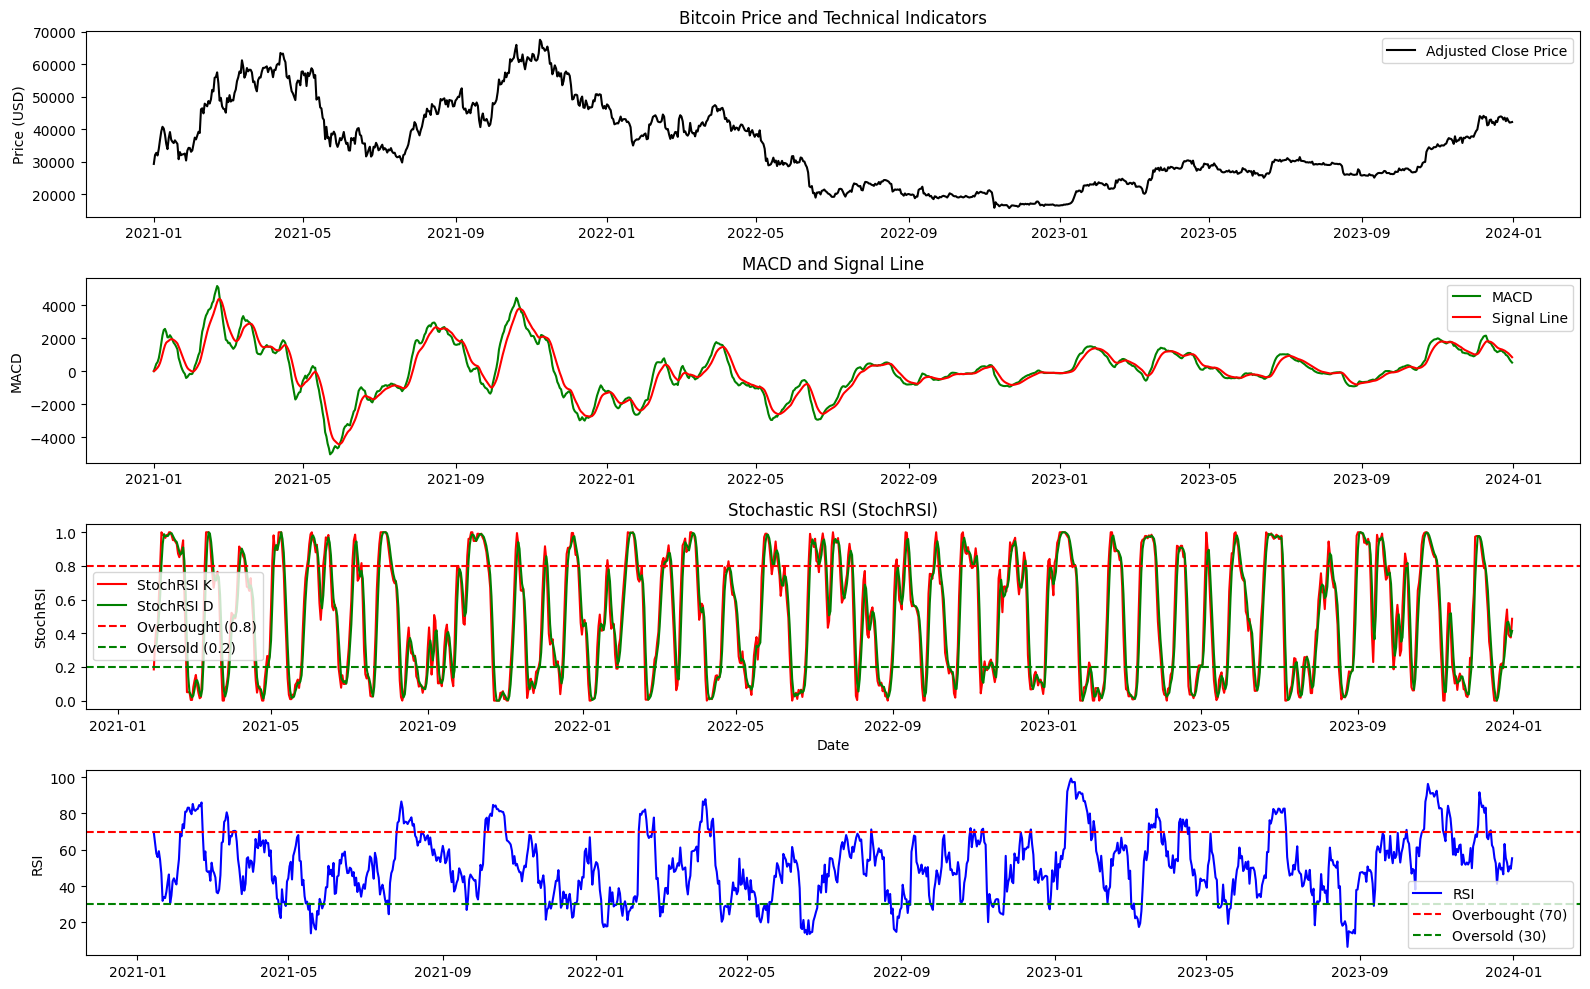

In [ ]:
import matplotlib.pyplot as plt

# Plot the original data and indicators
plt.figure(figsize=(16, 10))

# Price plot
plt.subplot(4, 1, 1)
plt.plot(bitcoin_data.index, bitcoin_data['Adj Close'], label='Adjusted Close Price', color='black')
plt.title('Bitcoin Price and Technical Indicators')
plt.ylabel('Price (USD)')
plt.legend()

# MACD plot
plt.subplot(4, 1, 2)
plt.plot(bitcoin_data.index, bitcoin_data['MACD'], label='MACD', color='green')
plt.plot(bitcoin_data.index, bitcoin_data['Signal'], label='Signal Line', color='red')
plt.title('MACD and Signal Line')
plt.ylabel('MACD')
plt.legend()

# StochRSI plot
plt.subplot(4, 1, 3)
plt.plot(bitcoin_data.index, bitcoin_data['StochRSI_K'], label='StochRSI K', color='red')
plt.plot(bitcoin_data.index, bitcoin_data['StochRSI_D'], label='StochRSI D', color='green')
plt.axhline(y=0.8, color='r', linestyle='--', label='Overbought (0.8)')
plt.axhline(y=0.2, color='g', linestyle='--', label='Oversold (0.2)')
plt.title('Stochastic RSI (StochRSI)')
plt.xlabel('Date')
plt.ylabel('StochRSI')
plt.legend()

# RSI plot
plt.subplot(4, 1, 4)
plt.plot(bitcoin_data.index, bitcoin_data['RSI'], label='RSI', color='blue')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.ylabel('RSI')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Calculate daily price movement as a percentage
bitcoin_data['Price_Movement'] = ((bitcoin_data['Close'] - bitcoin_data['Open']) / bitcoin_data['Open']) * 100

# Normalize the price movement between 0 and 1
bitcoin_data['Normalized_Price_Movement'] = (bitcoin_data['Price_Movement'] - bitcoin_data['Price_Movement'].min()) / (bitcoin_data['Price_Movement'].max() - bitcoin_data['Price_Movement'].min())

# Display the updated DataFrame
# bitcoin_data[['Price_Movement', 'Normalized_Price_Movement']]
bitcoin_data


,Open,High,Low,Close,Adj Close,Volume,EMA_5,EMA_25,EMA_50,EMA_99,EMA_200,RSI,MACD,Signal,StochRSI_K,StochRSI_D,Price_Movement,Normalized_Price_Movement
Date,,,,,,,,,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,29374.152344,29374.152344,29374.152344,29374.152344,29374.152344,NaN,0.000000,0.000000,NaN,NaN,1.311107,0.495978
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,30291.857422,29585.930439,29482.117647,29429.214648,29401.546525,NaN,219.621728,43.924346,NaN,NaN,9.364004,0.728096
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,31121.912760,29831.783746,29611.525717,29496.270824,29435.183111,NaN,441.418459,123.423168,NaN,NaN,2.031208,0.516735
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,31405.246528,29996.409155,29704.089966,29545.783689,29460.424215,NaN,545.536306,207.845796,NaN,NaN,-2.557180,0.384478
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,32267.640914,30303.795350,29872.260151,29634.716609,29505.518797,NaN,782.073914,322.691419,NaN,NaN,6.302612,0.639854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,43234.550571,42184.882536,40023.999168,36686.191067,33043.175948,52.953577,945.599611,1141.226728,0.541345,0.462468,2.174083,0.520853
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,43032.318870,42218.957377,40126.111180,36805.024356,33138.545893,48.025001,841.965503,1081.374483,0.395587,0.468391,-1.933238,0.402463
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,42721.346695,42209.760836,40203.495147,36910.911915,33227.708644,50.896402,709.019835,1006.903553,0.381535,0.439489,-1.209073,0.423336


<Axes: xlabel='Date'>

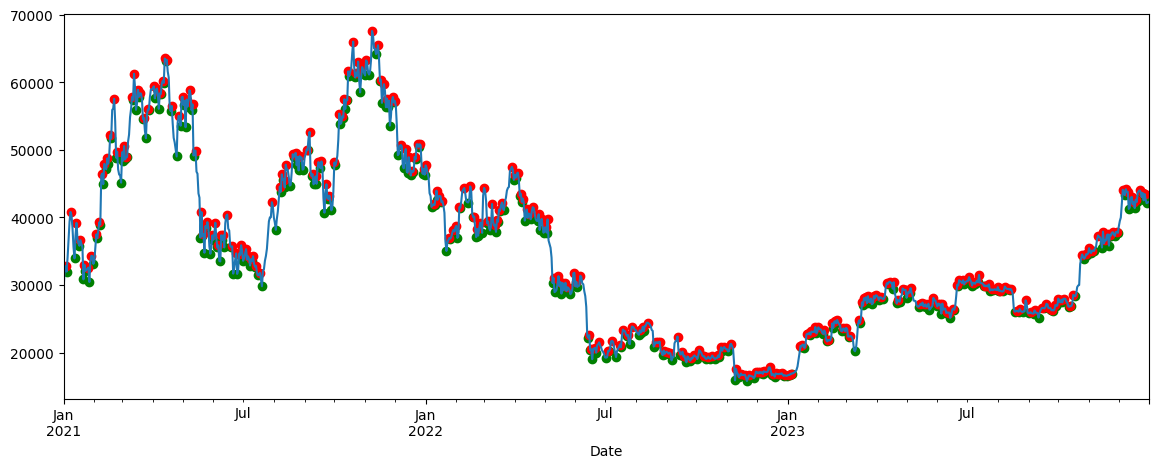

In [ ]:
bitcoin_data['min'] = bitcoin_data.Close[(bitcoin_data.Close.shift(1) > bitcoin_data.Close) & (bitcoin_data.Close.shift(-1) > bitcoin_data.Close)]
bitcoin_data['max'] = bitcoin_data.Close[(bitcoin_data.Close.shift(1) < bitcoin_data.Close) & (bitcoin_data.Close.shift(-1) < bitcoin_data.Close)]

plt.figure(figsize=(14, 5))
plt.scatter(bitcoin_data.index, bitcoin_data['min'], c='g')
plt.scatter(bitcoin_data.index, bitcoin_data['max'], c='r')
bitcoin_data.Close.plot()

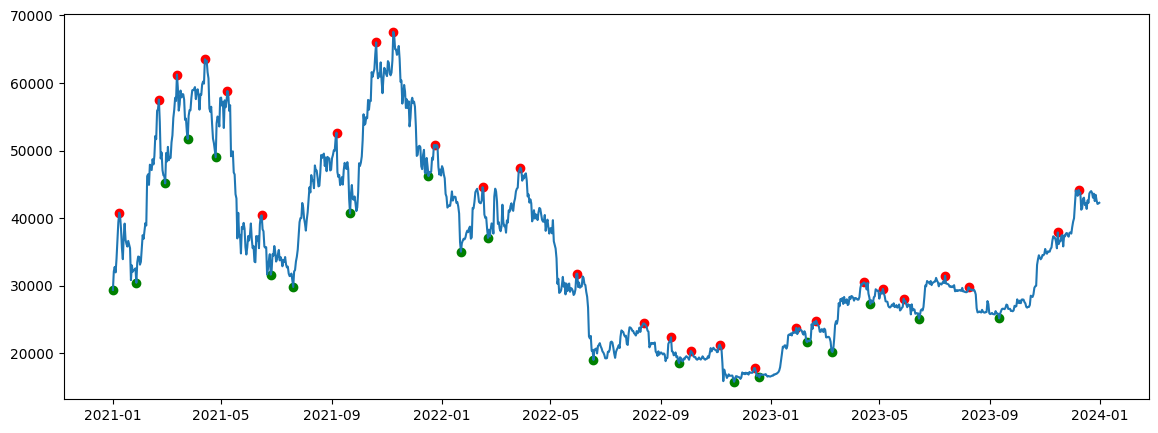

In [ ]:
from scipy.signal import argrelextrema
import numpy as np

n = 15 #points checked

bitcoin_data['min'] = bitcoin_data.iloc[argrelextrema(bitcoin_data.Close.values, np.less_equal,
                    order=n)[0]]['Close']
bitcoin_data['max'] = bitcoin_data.iloc[argrelextrema(bitcoin_data.Close.values, np.greater_equal,
                    order=n)[0]]['Close']

plt.figure(figsize=(14, 5))
plt.scatter(bitcoin_data.index, bitcoin_data['min'], c='g')
plt.scatter(bitcoin_data.index, bitcoin_data['max'], c='r')
plt.plot(bitcoin_data.index, bitcoin_data['Close'])
plt.show()

In [ ]:
import pandas as pd

def find_local_extremas(Date, Price, RSI, MACD, Signal):
    n = len(Price)

    local_extremas = []
    #local maximum
    for i in range(1, n-1):
        if Price[i-1] < Price[i] > Price[i+1]:
            local_extremas.append((Date[i], Price[i], RSI[i], MACD[i], Signal[i], 1))

    #local minimum
    for i in range(1, n-1):
        if Price[i-1] > Price[i] < Price[i+1]:
            local_extremas.append((Date[i], Price[i], RSI[i], MACD[i], Signal[i], 0))

    return local_extremas

Date = bitcoin_data.index.tolist()
Price = bitcoin_data['Adj Close'].tolist()
RSI = bitcoin_data['RSI'].tolist()
MACD = bitcoin_data['MACD'].tolist()
Signal = bitcoin_data['Signal'].tolist()

bitcoin_extremas = find_local_extremas(Date, Price, RSI, MACD, Signal)

extremas_df = pd.DataFrame(bitcoin_extremas, columns=['Date', 'Price', 'RSI', 'MACD', 'Signal', 'Type'])

extremas_df


,Date,Price,RSI,MACD,Signal,Type
0,2021-01-03,32782.023438,NaN,441.418459,123.423168,1
1,2021-01-08,40797.609375,NaN,2179.352717,1022.971583,1
2,2021-01-14,39187.328125,69.483969,2178.640726,1910.107681,1
3,2021-01-18,36630.074219,59.242543,1624.765872,1837.171729,1
4,2021-01-22,33005.761719,34.005765,555.029781,1312.799092,1
...,...,...,...,...,...,...
579,2023-12-17,41364.664062,55.392152,1270.203805,1585.397019,0
580,2023-12-19,42270.527344,41.267414,1149.320942,1440.686004,0
581,2023-12-24,43016.117188,46.502811,1138.360757,1276.440280,0
582,2023-12-26,42520.402344,55.424352,981.138424,1190.133507,0


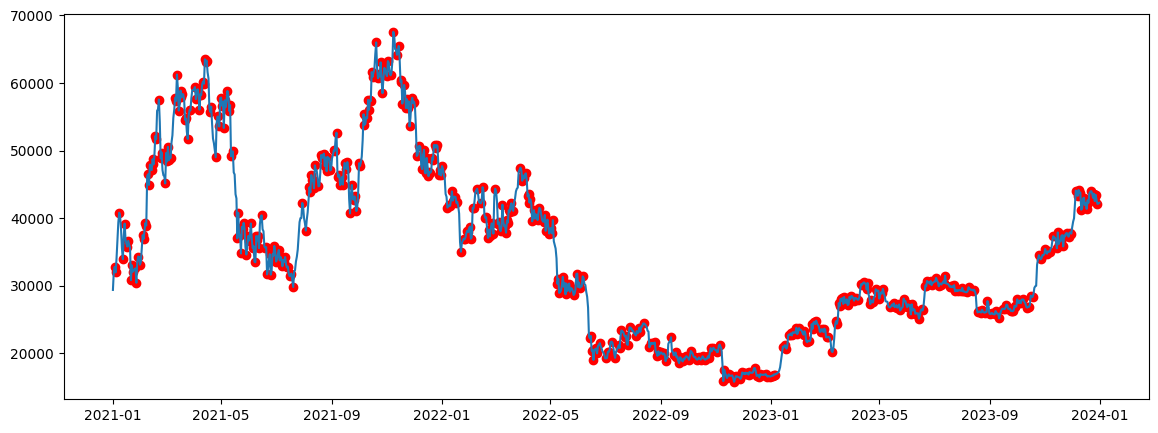

In [ ]:
plt.figure(figsize=(14, 5))

plt.scatter(extremas_df['Date'], extremas_df['Price'], c='r')
plt.plot(bitcoin_data.index, bitcoin_data['Adj Close'])

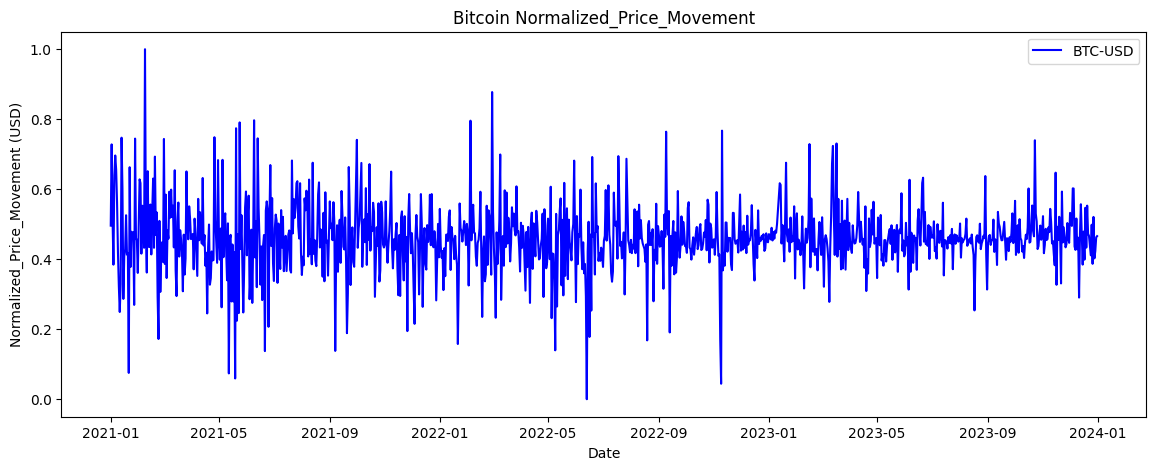

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(bitcoin_data.index, bitcoin_data['Normalized_Price_Movement'], label='BTC-USD', color='b')

plt.title('Bitcoin Normalized_Price_Movement')
plt.xlabel('Date')
plt.ylabel('Normalized_Price_Movement (USD)')
plt.legend()
plt.show()
